# Making Own Mock Data
The last bit of mock data that was tried (in `work-with-true.ipynb`) already contained selection effects that distorted the $35M_\odot$ bump that the code was trying to pin down. To see if the algorithm can even handle it at all and to see what the selection effects do to the analysis, mock data data without selection effects need to be generated and tested, which is what we're doing here

In [1]:
import numpy as np
from scipy.stats import gaussian_kde
import pymc as pm
from pylab import *
import arviz as az
from astropy.cosmology import Planck18
from tqdm import tqdm
import seaborn as sns
from MCMC_functions import *
from astropy.cosmology import units as cu

sns.set_context('notebook')
sns.set_palette('colorblind')

import matplotlib
matplotlib.rcParams['font.family'] = 'serif' # so these plots can go into thesis


%matplotlib inline

## Generating data points

In [2]:
# Parameters:

N = int(1E4) # Number of data points

### Mass function: all mass in units of M_sun
m_scale = -2.35 # exponent in exponential function
m_min = 5 # minimum mass
m_max = 100 # maximum mass
m_bump = 35 # location of bump
sigma_bump = 5 # width of bump

frac_bump = 0.3 # fraction of BH in bump

zmax = 5
dl_max = Planck18.luminosity_distance(zmax)

Text(0.5, 1.0, 'Sample Black Hole Mass function')

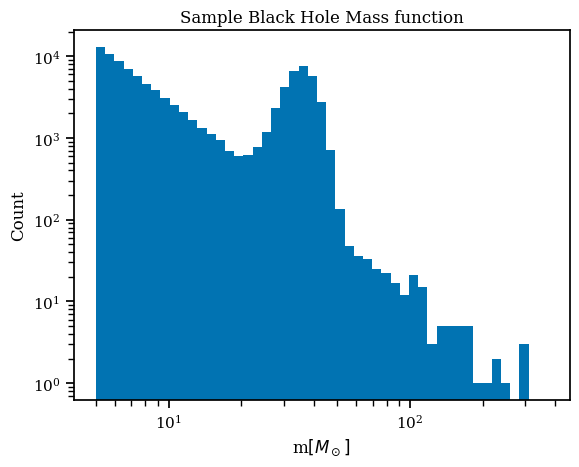

In [3]:
### Plotting Mass Function just to make sure it works properly

samples = generate_masses(int(1E5))

plt.hist(samples, bins=np.logspace(np.log10(5), np.log10(max(samples)), 50))
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r"m$[M_\odot]$")
plt.ylabel("Count")
plt.title("Sample Black Hole Mass function")

Text(0.5, 1.0, 'Sample Luminosity Distance Distribution')

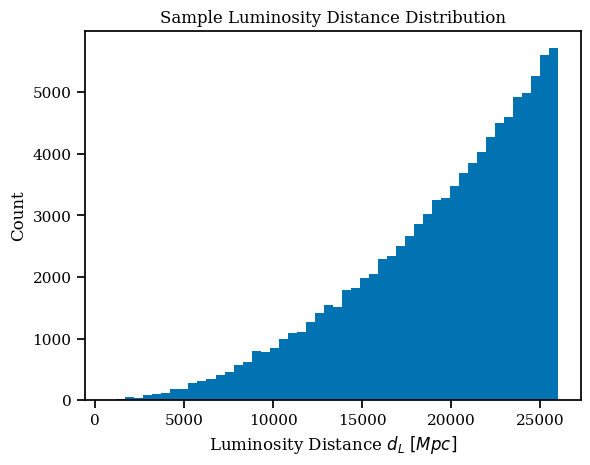

In [4]:
plt.hist(generate_dLs(int(1E5)), bins=50)
plt.xlabel(r"Luminosity Distance $d_L$ $[Mpc]$")
plt.ylabel("Count")
plt.title("Sample Luminosity Distance Distribution")

In [8]:
n_samples = int(1e4)

ms_src = generate_masses(n_samples)
dls    = generate_dLs(n_samples)
zs     = dLs_to_zs(dls)
ms_det = ms_src*(1+zs)

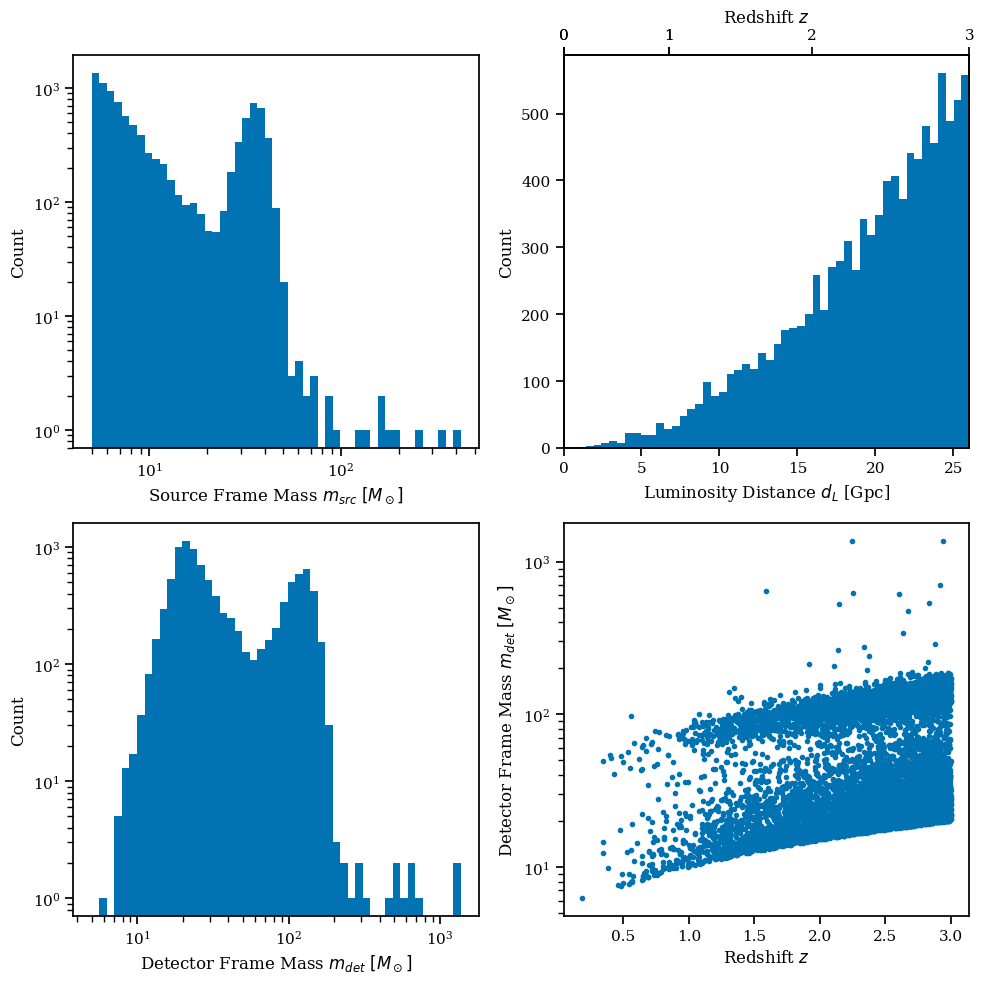

In [9]:
fig = plt.figure(figsize=(10, 10))

### Masses
ax1 = fig.add_subplot(221)
#ax1.set_title("Source Frame Black Hole Mass Function")
ax1.hist(ms_src, bins=np.logspace(np.log10(5), np.log10(max(ms_src)), 50))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel(r"Source Frame Mass $m_{src}$ $[M_\odot]$")
ax1.set_ylabel("Count")

### D_Ls
ax2 = fig.add_subplot(222)
#ax2.set_title("Sample Redshift Distribution")
ax2.hist(dls/1000, bins=50)
ax2.set_xlabel(r"Luminosity Distance $d_L$ [Gpc]")
ax2.set_ylabel("Count")

### Add redshift axis
ax3 = ax2.twiny()
tick_labels = np.linspace(0, 3, 6, dtype=int)
new_tick_locations = Planck18.luminosity_distance(tick_labels)
ax3.set_xticks(new_tick_locations.value)
ax3.set_xticklabels(tick_labels)
ax3.set_xlabel(r"Redshift $z$")
ax2.set_xlim(0, Planck18.luminosity_distance(max(tick_labels)).value/1000)


### Detector frame histogram
ax4 = fig.add_subplot(223)
#ax4.set_title("Detector Frame Mass Function")
ax4.hist(ms_det, bins=np.logspace(np.log10(5), np.log10(max(ms_det)), 50))
ax4.set_xlabel(r"Detector Frame Mass $m_{det}$ $[M_\odot]$")
ax4.set_ylabel("Count")
ax4.set_xscale('log')
ax4.set_yscale('log')


### Redshift-mass scatter
ax5 = fig.add_subplot(224)
#ax5.set_title("Detector Frame masses vs Redshift")
ax5.scatter(zs, ms_det, marker='.')
# ax5.set_xscale('log')
ax5.set_yscale('log')
ax5.set_xlabel(r"Redshift $z$")
ax5.set_ylabel(r"Detector Frame Mass $m_{det}$ $[M_\odot]$")


fig.tight_layout()